In [1]:
import numpy as np
from numpy import polynomial as P
import matplotlib.pyplot as plt

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Enero - Junio 2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

# 3. Interpolación y Aproximación polinómica

**3.1 Polinomios de Taylor**

**3.2 Polinomios de Lagrange**

## Problema

Frecuentemente, es necesario estimar valores intermedios a partir de grupos de datos con puntos precisos. Los métodos más comunes se basan en interpolación mediante polinomios.

Recordando, que la formula general para la expresión de un polinomio de orden $n$ es:

$$f(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$$

Para $n+1$  pares de datos, existe solo un polinomio de orden $n$ que pasa por todos los puntos. 

Esto se muestra en el bloque de código debajo, en el cuál el utilizador puede modificar el número de pares de datos, $x,y$, y observar como se modifica el polinomio resultante, y que este pasa por todos los puntos de datos.

f(x) = 2.0 - 3.5·x + 3.0·x² - 0.5·x³


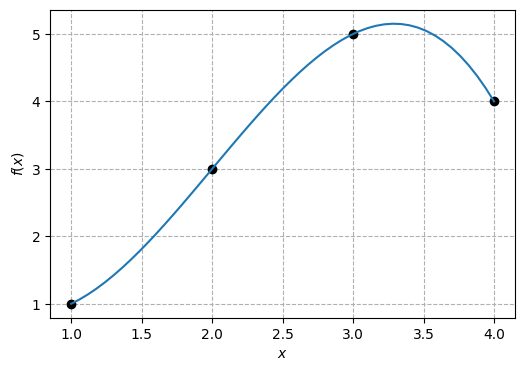

In [2]:
# modificar [x, y], para cambiar el número de puntos de datos
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])

deg = len(x) - 1

# En esta parte se ajusta el polinomio, y se imprime en pantalla
A = P.polynomial.polyvander(x, deg)
c = np.linalg.solve(A, y)
f1 = P.Polynomial(c)
print(f"f(x) = {f1}")

# demostración gráfica
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, 'ok')
xx = np.linspace(min(x), max(x), 51)
ax.plot(xx, f1(xx))
ax.grid(ls='--')
ax.set(xlabel=r"$x$", ylabel="$f(x)$")
plt.show()

El proceso de interpolación consiste en encontrar el valor de los coeficientes del polinomio que satisfaga estas condiciones, y obtener una función que permita estimar los valores intemedios.

Aunque existe únicamente un polinomio de orden $n$ que pasa exactamente por $n+1$ puntos, existen distintas bases matemáticas en las que este polinomio se puede escribir.

Notese en los resultados del bloque de código debajo, que aunque las bases de los polinomios son diferentes (serie de potencias, y Chebyshev), el polinomio resultante es único, y al evaluar las funciones de interpolación, estas provéen el mismo resultado.

f(x) = 2.0 - 3.5·x + 3.0·x² - 0.5·x³
c(x) = 3.5 - 3.875·T₁(x) + 1.5·T₂(x) - 0.125·T₃(x)


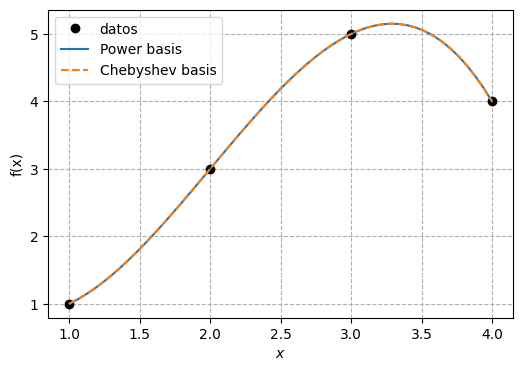

In [3]:
# modificar [x, y], para cambiar el número de puntos de datos
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])

deg = len(x) - 1

# Polinomio de serie de potencias
A = P.polynomial.polyvander(x, deg)
c = np.linalg.solve(A, y)
f1 = P.Polynomial(c)
print(f"f(x) = {f1}")

# Polinomio de Cheyshev
A = P.chebyshev.chebvander(x, deg)
c = np.linalg.solve(A, y)
c1 = P.Chebyshev(c)
print(f"c(x) = {c1}")

# demostración gráfica
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, 'ok', label='datos')
xx = np.linspace(min(x), max(x), 51)
ax.plot(xx, f1(xx), ls='-', label='Power basis')
ax.plot(xx, c1(xx), ls='--', label='Chebyshev basis')
ax.grid(ls='--')
ax.legend()
ax.set(xlabel=r"$x$", ylabel="f(x)")
plt.show()
